# **支持向量机**

实验的上半部分将使用 SVM 对三个数据集进行分类实验，包括线性可分和基于高斯核函数的线性不可分的 SVM，以及如何搜索最优的模型参数。

首先在主程序 `ex3.py` 中导入程序所依赖的第三方库并对绘图参数进行适当配置：

In [35]:
# 依赖的第三方库
import scipy.misc, scipy.io, scipy.optimize
from sklearn import svm
from sklearn import model_selection
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rc("text", usetex=True)

为了使用的方便性并减少代码的冗余，我们需要实现一个图像绘制函数 `plot(dataset)` 以及一个决策边界的绘制函数 `visualize_boundary(X, model):`

In [36]:
def plot(data):
    positives = data[data[:, 2] == 1]
    negatives = data[data[:, 2] == 0]
    # 正样本用+号绘制
    plt.plot(positives[:, 0], positives[:, 1], "b+")
    # 负样本用o号绘制
    plt.plot(negatives[:, 0], negatives[:, 1], "yo")


def visualize_boundary(X, trained_svm):
    kernel = trained_svm.get_params()["kernel"]
    # 线性核函数
    if kernel == "linear":
        w = trained_svm.coef_[0]
        i = trained_svm.intercept_
        xp = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
        a = -w[0] / w[1]
        b = i[0] / w[1]
        yp = a * xp - b
        plt.plot(xp, yp, "b-")
    # 高斯核函数
    elif kernel == "rbf":
        x1plot = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
        x2plot = np.linspace(min(X[:, 1]), max(X[:, 1]), 100)
        X1, X2 = np.meshgrid(x1plot, x2plot)
        vals = np.zeros(np.shape(X1))
        for i in range(0, np.shape(X1)[1]):
            this_X = np.c_[X1[:, i], X2[:, i]]
            vals[:, i] = trained_svm.predict(this_X)
        plt.contour(X1, X2, vals, colors="blue")


## **线性可分 SVM**

在函数 part1 中实现线性可分部分的代码。在训练模型之前首先需要对数据集进行加载以及观察：

Failed to find a Ghostscript installation.  Distillation step skipped.


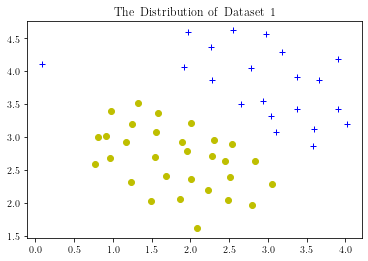

In [37]:
# 加载数据集1
mat = scipy.io.loadmat("dataset_1.mat")
X, y = mat['X'], mat['y']
# 绘制数据集1
plt.title("$\mathrm{The\enspace Distribution\enspace of\enspace Dataset\enspace 1}$")
plot(np.c_[X, y])
plt.savefig('image/Distribution.eps')
plt.show(block=True)

接下来尝试不同参数的 SVM 进行对比实验，首先是 $C=1$ 时的 SVM 模型训练：

In [38]:
# 训练线性SVM（C = 1）
linear_svm = svm.SVC(C=1, kernel='linear')
linear_svm.fit(X, y.ravel())

SVC(C=1, kernel='linear')

Failed to find a Ghostscript installation.  Distillation step skipped.


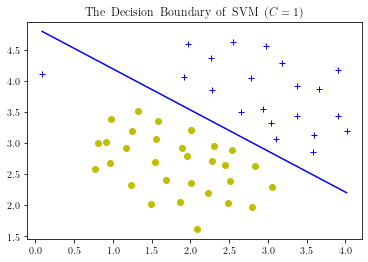

In [39]:
# 绘制C=1的SVM决策边界
plt.title('$\mathrm{The\enspace Decision\enspace Boundary\enspace of\enspace SVM\enspace}(C=1)$',usetex=True)
plot(np.c_[X, y])
visualize_boundary(X, linear_svm)
plt.savefig('image/Boundary.eps')
plt.show(block=True)

接下来是 $C=100$ 时的 SVM 模型作为对比，这部分需要我们实现：

In [40]:
# 训练线性SVM（C = 100）
linear_svm_100 = svm.SVC(C=100, kernel='linear')
linear_svm_100.fit(X, y.ravel())

SVC(C=100, kernel='linear')

绘制出该 SVM 拟合出的决策边界：

Failed to find a Ghostscript installation.  Distillation step skipped.


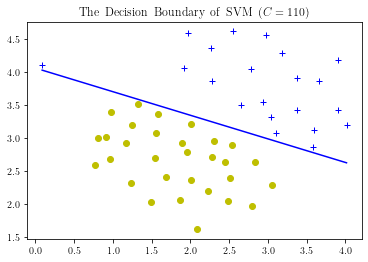

In [41]:
# 绘制C=100的SVM决策边界
plt.title('$\mathrm{The\enspace Decision\enspace Boundary\enspace of\enspace SVM\enspace}(C=110)$',usetex=True)
plot(np.c_[X, y])
visualize_boundary(X, linear_svm_100)
plt.savefig('image/Boundary_100.eps')
plt.show(block=True)

通过对比将会发现，$C=1$ 时 SVM 训练出的决策边界大体上可以将两类样本区分，但是并没有正确地分类上面所提到的离群点，而 $C=100$ 时训练得到的 SVM 正确地将该离群点划分到了对应类的样本中。

## **非线性可分 SVM**

In [45]:
def gaussian_kernel(x1, x2, sigma):

    n = np.size(x1)
    sum = 0
    for i in range(0, n):
        sum += (x1[i] - x2[i]) ** 2

    K = np.exp(-sum / (2 * sigma ** 2))
    return K

根据高斯核函数计算给定的两个样例 $x_1$ 和 $x_2$ 的相似度来测试函数，该部分在函数 part2 中实现：

In [46]:
# 计算高斯核函数
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2
print("Similarity: %f" % gaussian_kernel(x1, x2, sigma))

Similarity: 0.324652


下一步将需要加载并绘制数据集2，用于非线性 SVM 的训练，这部分需要我们实现：

Failed to find a Ghostscript installation.  Distillation step skipped.


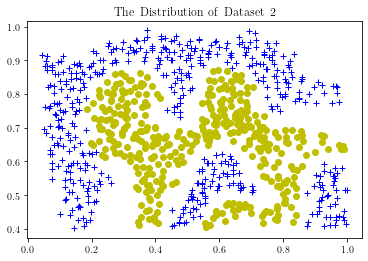

In [50]:
# 加载数据集2
mat_2 = scipy.io.loadmat("dataset_2.mat")
X_2, y_2 = mat_2["X"], mat_2["y"]

# 绘制数据集2
plt.title("$\mathrm{The\enspace Distribution\enspace of\enspace Dataset\enspace 2}$")
plot(np.c_[X_2, y_2])
plt.savefig("image/Distribution_2.eps")
plt.show(block=True)

Failed to find a Ghostscript installation.  Distillation step skipped.


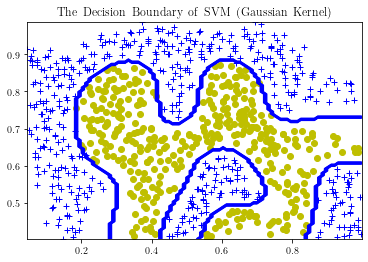

In [54]:
# 训练高斯核函数SVM
sigma = 0.01
rbf_svm = svm.SVC(C=1, kernel='rbf', gamma=1.0 / sigma)  # gamma实际上是sigma的倒数
rbf_svm.fit(X_2, y_2.ravel())

# 绘制非线性SVM的决策边界
plt.title('$\mathrm{The\enspace Decision\enspace Boundary\enspace of\enspace SVM\enspace (Gaussian\enspace Kernel)}$',usetex=True)
plot(np.c_[X_2, y_2])
visualize_boundary(X_2, rbf_svm)
plt.savefig('image/Boundary_Gaussian.eps')
plt.show(block=True)

## **最优参数搜素**

Failed to find a Ghostscript installation.  Distillation step skipped.


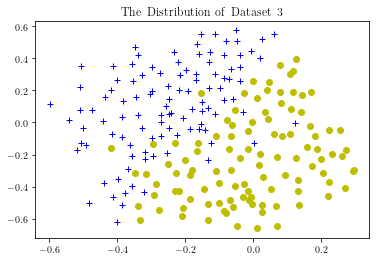

Failed to find a Ghostscript installation.  Distillation step skipped.


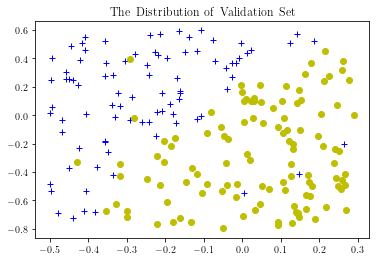

In [57]:
# 加载数据集3获得训练集和验证集
mat_3 = scipy.io.loadmat("dataset_3.mat")
X_3, y_3 = mat_3['X'], mat_3['y'] # 训练集
X_val, y_val = mat_3['Xval'], mat_3['yval'] # 验证集

# 绘制数据集3
plt.title("$\mathrm{The\enspace Distribution\enspace of\enspace Dataset\enspace 3}$")
plot(np.c_[X_3, y_3])
plt.savefig("image/Distribution_3.eps")
plt.show(block=True)

# 绘制验证集
plt.title("$\mathrm{The\enspace Distribution\enspace of\enspace Validation\enspace Set}$")
plot(np.c_[X_val, y_val])
plt.savefig("image/Distribution_val.eps")
plt.show(block=True)

In [58]:
def params_search(X, y, X_val, y_val):
    np.c_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    sigma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    raveled_y = y.ravel()
    m_val = np.shape(X_val)[0]
    
    rbf_svm = svm.SVC(kernel='rbf')
    best = {'error': 999, 'C': 0.0, 'sigma': 0.0}

    for C in np.c_values:
        for sigma in sigma_values:
            # 根据不同参数训练SVM
            rbf_svm.set_params(C=C)
            rbf_svm.set_params(gamma=1.0 / sigma)
            rbf_svm.fit(X, raveled_y)

            # 预测并计算误差
            predictions = []
            for i in range(0, m_val):
                prediction_result = rbf_svm.predict(X_val[i].reshape(-1, 2))
                predictions.append(prediction_result[0])

            predictions = np.array(predictions).reshape(m_val, 1)
            error = (predictions != y_val.reshape(m_val, 1)).mean()
        
            # 记录误差最小的一组参数
            if error < best['error']:
                best['error'] = error
                best['C'] = C
                best['sigma'] = sigma
    best['gamma'] = 1.0 / best['sigma']
    return best

Failed to find a Ghostscript installation.  Distillation step skipped.


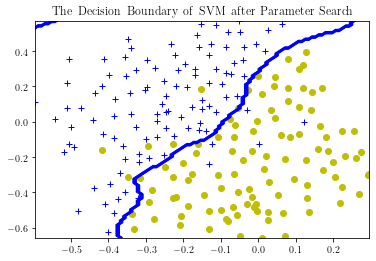

In [66]:
# 训练高斯核函数SVM并搜索使用最优模型参数
rbf_svm = svm.SVC(kernel="rbf")
list_opt = params_search(X_3, y_3, X_val, y_val)
rbf_svm.set_params(C=list_opt["C"], gamma=1.0 / list_opt["sigma"])
rbf_svm.fit(X_3, y_3.ravel())

# 绘制决策边界
plt.title(
    "$\mathrm{The\enspace Decision\enspace Boundary\enspace of\enspace SVM\enspace after\enspace Parameter\enspace Search}$",
    usetex=True,
)
plot(np.c_[X_3, y_3])
visualize_boundary(X_3, rbf_svm)
plt.savefig("image/Boundary_Param.eps")
plt.show(block=True)